Reading 0 ... 264396  =      0.000 ...   528.792 secs...


C:\Users\lyz\AppData\Local\Temp\ipykernel_16468\4155880333.py:12: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(cnt_file, preload=True)


Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective window size : 1.002 (s)
Effective wind

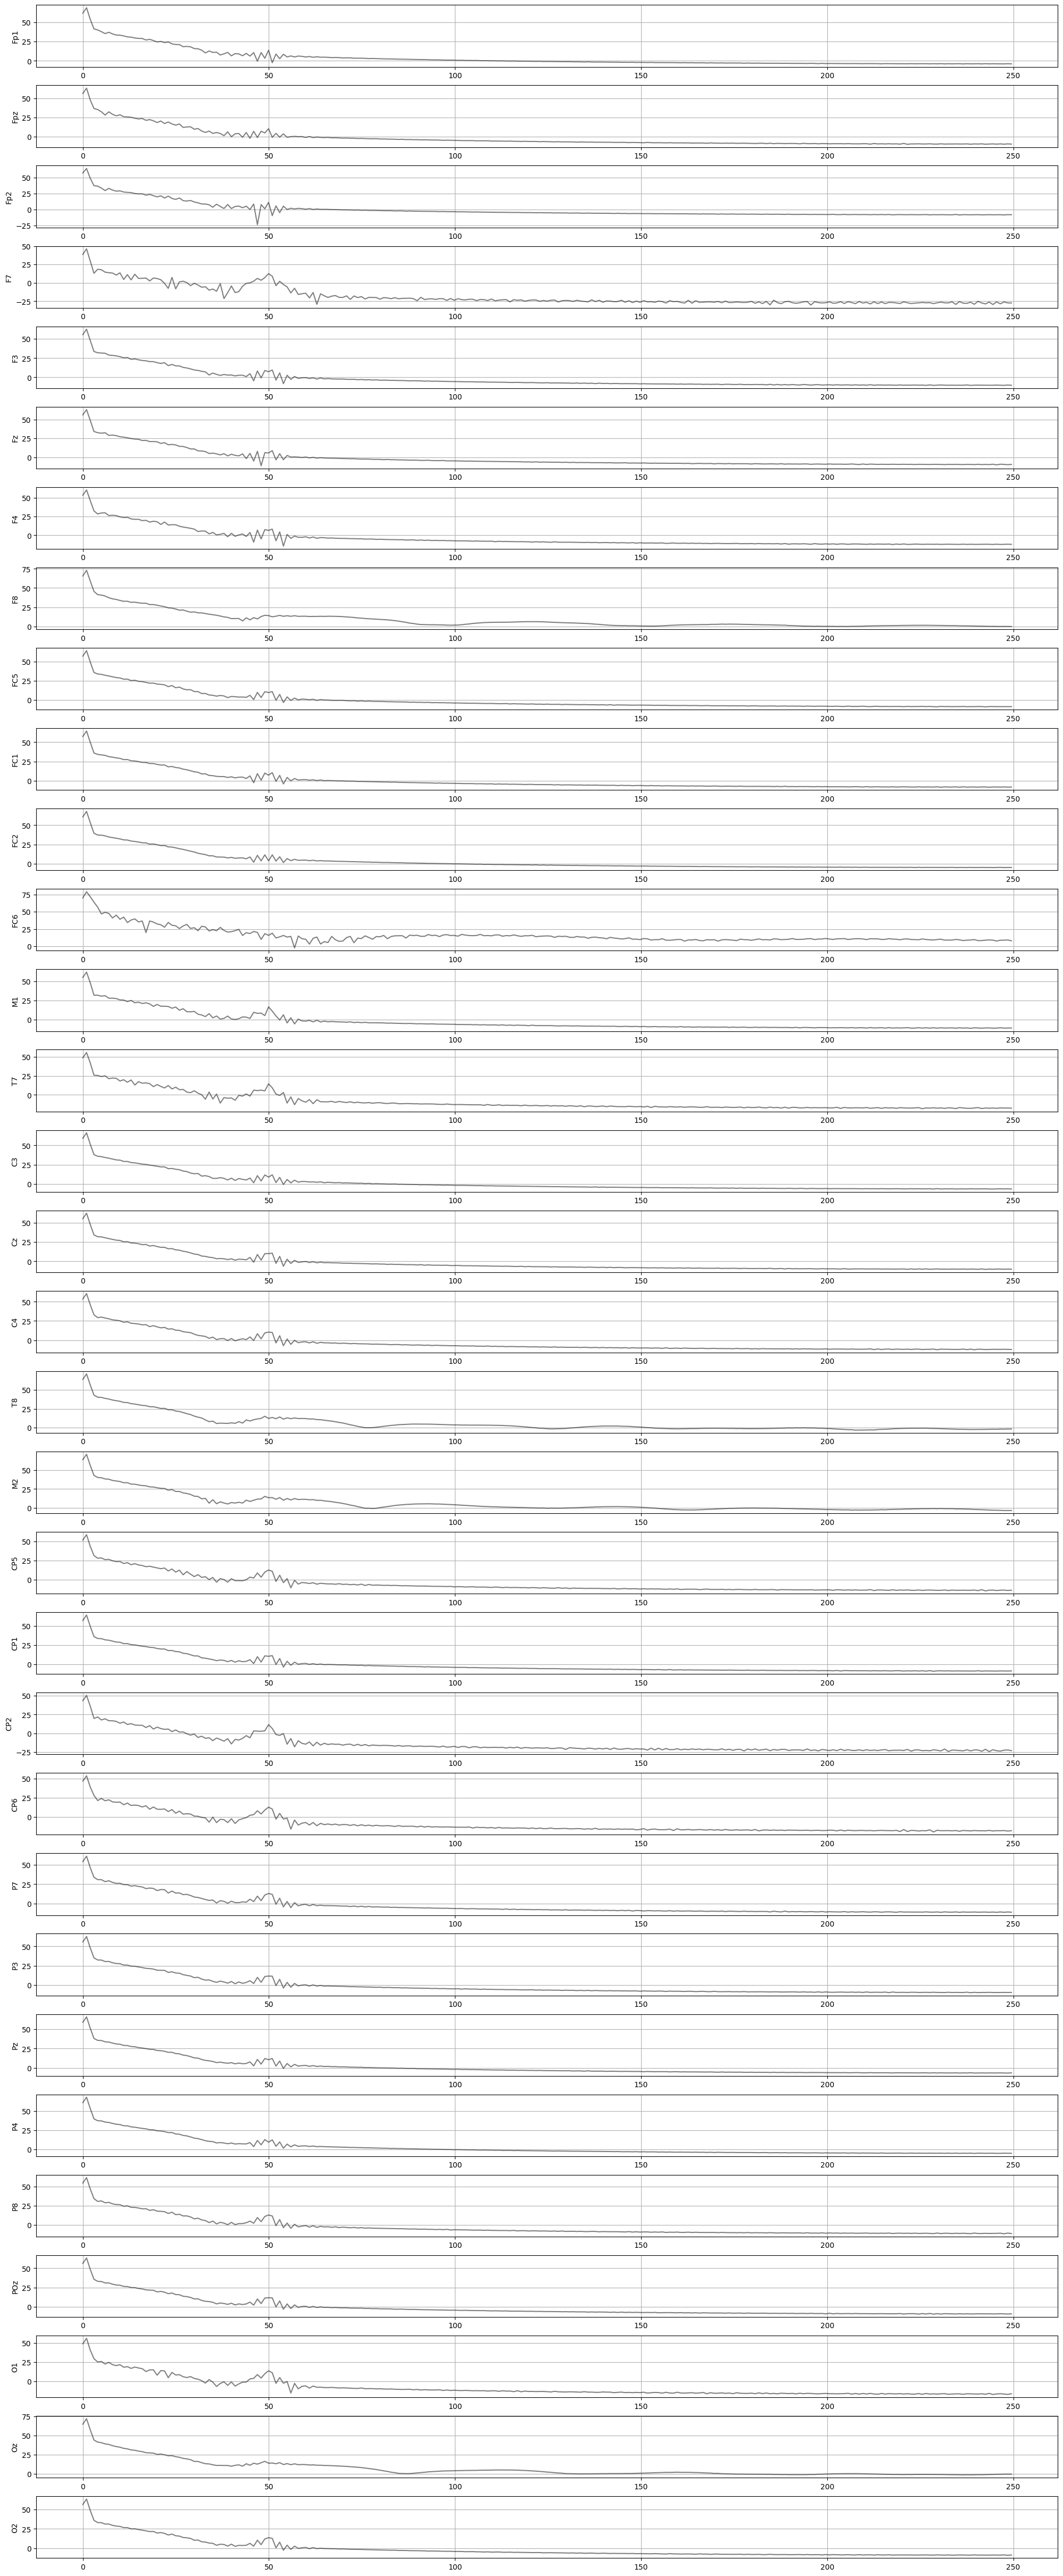

In [10]:
# 引入python库
import mne
import os
from mne.datasets import sample
import matplotlib.pyplot as plt
import numpy as np

# 指定CNT文件路径
cnt_file = 'D:\\TVB_Distribution\\test\\DATA\\A_MI.cnt'

# 使用mne加载CNT文件
raw = mne.io.read_raw_cnt(cnt_file, preload=True)

# new_sfreq = 1024  # 新的采样率（以毫秒为单位）
# raw.resample(new_sfreq)

# 可以访问加载的数据
# print(raw.info)

# 定义时间 s
time_start = 0.
time_end = 1.0

# selection参数可以帮助选择通道
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')

# Convert time to indices.
t_idx = raw.time_as_index([time_start, time_end])

# 获得电位差数据
data, times = raw[picks, t_idx[0]:t_idx[1]]

for i in range(0, 32, 1):
    axes = plt.subplot(32,1,i+1)
    spec = raw.compute_psd(tmin = time_start, tmax = time_end, 
                    picks = picks[i], reject_by_annotation = True)
    axes.plot(spec.freqs, 10 * np.log10(spec.get_data().T)+120, 'k', alpha=0.5)
    axes.grid(True)
    plt.ylabel(raw.info.ch_names[i])
    
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=10,
                    wspace=0,
                    hspace=0.3
                   )

plt.show()

Reading 0 ... 264396  =      0.000 ...   528.792 secs...


C:\Users\lyz\AppData\Local\Temp\ipykernel_16468\2160589846.py:13: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  raw = mne.io.read_raw_cnt(cnt_file, preload=True)


<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2019-04-30 08:15:52 UTC
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
1000


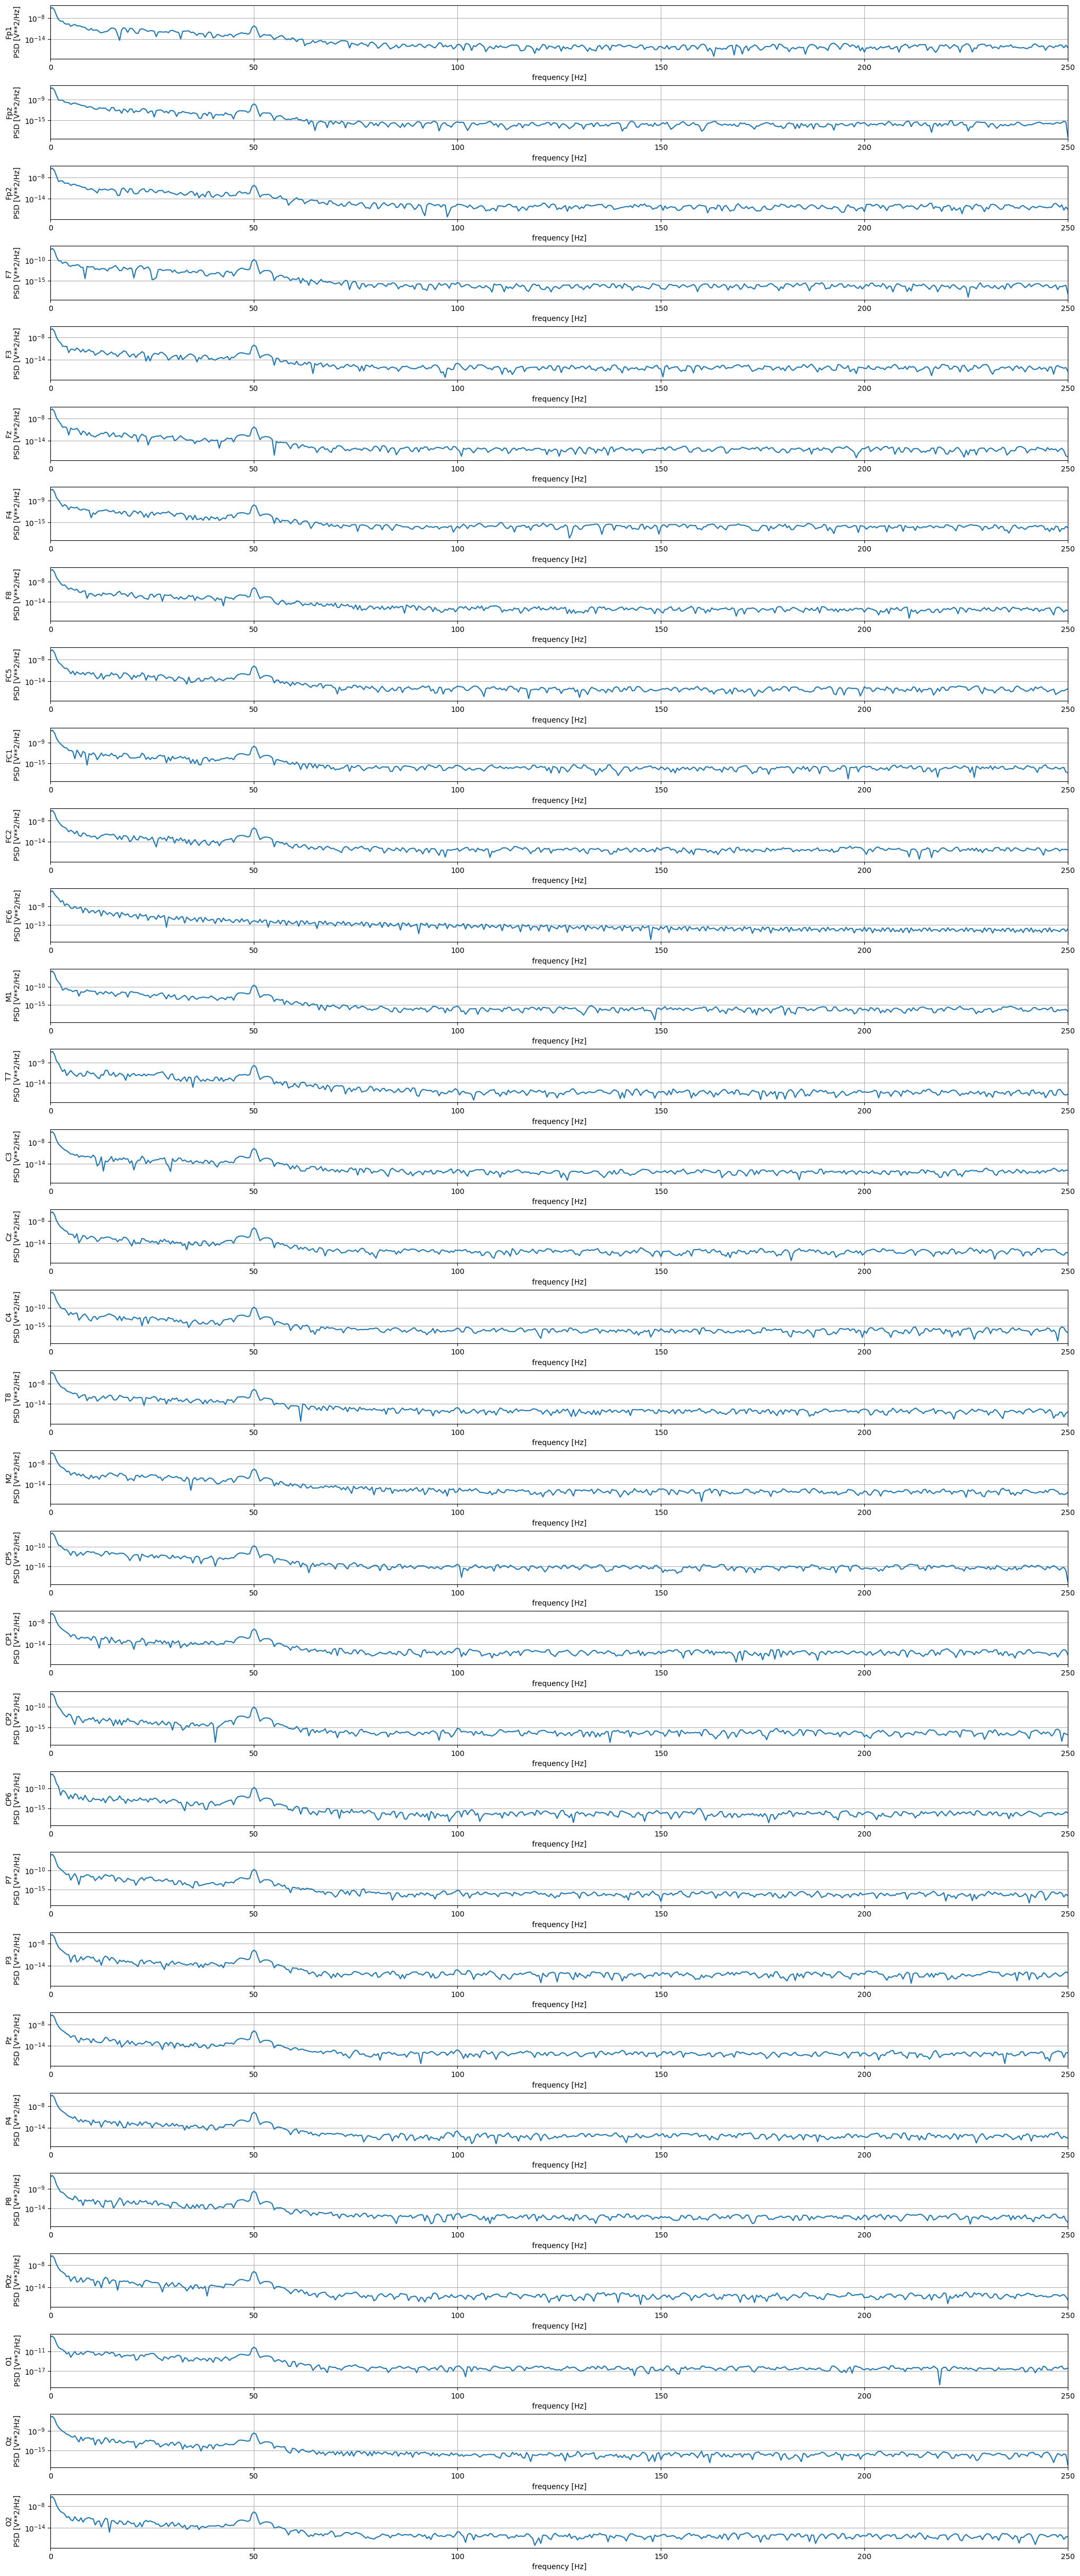

In [65]:
import scipy.signal
import mne
import os
import matplotlib.pyplot as plt
import numpy as np

# 指定CNT文件路径
cnt_file = 'D:\\TVB_Distribution\\test\\DATA\\A_MI.cnt'

# 使用mne加载CNT文件
time_start = 0.
time_end = 2.0
raw = mne.io.read_raw_cnt(cnt_file, preload=True)
picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
t_idx = raw.time_as_index([time_start, time_end])
data, times = raw[picks, t_idx[0]:t_idx[1]]

# f contains the frequency components
# S is the PSD
(f, S)= scipy.signal.welch(data, 500, nperseg=1024)

# 12,13 is the M1 and M2 channel
avg = data[12:13, :] + data[13:14, :]
data = data - avg/2

for i in range(0, 32, 1):
    plt.subplot(32, 1, i + 1)
    plt.semilogy(f, S[i])
    plt.xlim([0, 250])
    plt.xlabel('frequency [Hz]')
    plt.ylabel(raw.info.ch_names[i] + '\nPSD [V**2/Hz]')
    plt.grid(True)

plt.subplots_adjust(left=0,
                    bottom=0,
                    right=3,
                    top=10,
                    wspace=0,
                    hspace=0.5
                   )

plt.show()